# 1) Sơ lược về Rotten Tomatoes

* **Rotten Tomatoes (Cà chua thối)** là trang web tổng hợp đánh giá phim ảnh và chương trình truyền hình. Trang web này thu thập bài đánh giá từ các nhà phê bình chuyên nghiệp và khán giả, sau đó tổng hợp thành **tỷ lệ phần trăm đánh giá tích cực**.
* **Điểm nổi bật:**
1) **Hệ thống "Cà chua":** Rotten Tomatoes sử dụng hệ thống **"Cà chua"** để biểu thị **tỷ lệ phần trăm đánh giá tích cực** của nhà phê bình và khán giả để đánh giá phim.
2) **Đánh giá từ nhà phê bình và khán giả:** Rotten Tomatoes cung cấp tỷ lệ đánh giá riêng biệt từ các nhà phê bình và khán giả. Điều này giúp người xem có thể tham khảo ý kiến từ cả hai nhóm trước khi quyết định xem phim.
3) **Thông tin chi tiết:** Rotten Tomatoes cung cấp nhiều thông tin chi tiết về phim như tóm tắt nội dung, dàn diễn viên, trailer, tin tức, v.v.

# 2) Sơ lược về DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv("rotten_tomatoes_movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [3]:
df.head(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.0,149.0,Spilled,37.0,411140.0,37,12,137
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...","Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,...,Gaumont British Distributors,Certified-Fresh,96.0,51.0,Upright,86.0,23890.0,8,49,2
7,m/1000123-310_to_yuma,3:10 to Yuma,"Dan Evans (Van Heflin), a drought-plagued Ariz...",NaN,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,...,Columbia Pictures,Fresh,96.0,28.0,Upright,79.0,9243.0,6,27,1
8,m/10002008-charly,Charly (A Heartbeat Away),"Cultural differences, past loves and personal ...",NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,...,Excel Entertainment,Rotten,20.0,10.0,Upright,87.0,4819.0,0,2,8
9,m/1000204-abraham_lincoln,Abraham Lincoln,The 16th U.S. president (Walter Huston) is por...,NaN,NR,"Classics, Drama",D.W. Griffith,"Gerrit J. Lloyd, Stephen Vincent Benét","Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,...,United Artists,Fresh,82.0,11.0,Spilled,40.0,457.0,4,9,2


In [4]:
df.tail(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
17702,m/zoo_2018,Zoo,A 12-year old boy and his misfit friends enlis...,NaN,PG,"Action & Adventure, Kids & Family",Colin McIvor,Colin McIvor,"Art Parkinson, Penelope Wilton, Amy Huberman, ...",2018-06-08,...,Samuel Goldwyn Films,Fresh,88.0,17.0,Upright,62.0,128.0,3,15,2
17703,m/zookeeper,Zookeeper,Kindhearted Griffin Keyes (Kevin James) is one...,Zookeeper smothers Kevin James's with a sodden...,PG,"Comedy, Romance","Frank Coraci, Walt Becker","Jay Scherick, David Ronn, Nick Bakay, Rock Reu...","Kevin James, Rosario Dawson, Ken Jeong, Leslie...",2011-07-08,...,Columbia Pictures,Rotten,14.0,132.0,Spilled,41.0,44713.0,36,18,114
17704,m/zoolander,Zoolander,Propelled to the top of the fashion world by a...,"A wacky satire on the fashion industry, Zoolan...",PG-13,"Comedy, Special Interest",Ben Stiller,"Drake Sather, John Hamburg, Ben Stiller","Ben Stiller, Owen Wilson, Will Ferrell, Christ...",2001-09-28,...,Paramount Pictures,Fresh,64.0,138.0,Upright,80.0,944800.0,33,88,50
17705,m/zoolander_2,Zoolander 2,Former models Derek Zoolander (Ben Stiller) an...,Zoolander No. 2 has more celebrity cameos than...,PG-13,Comedy,Ben Stiller,"Nicholas Stoller, John Hamburg, Ben Stiller, J...","Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",2016-02-12,...,Paramount Pictures,Rotten,22.0,232.0,Spilled,20.0,41745.0,48,51,181
17706,m/zoom_2006,Zoom,"Capt. Zoom, or Jack (Tim Allen), as he is now ...",Lacking the punch and good cheer of The Incred...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",2006-08-11,...,Sony Pictures Entertainment,Rotten,4.0,68.0,Spilled,33.0,11369.0,19,3,65
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1
17711,m/zulu_dawn,Zulu Dawn,Sir Henry Bartle Frere's (John Mills) vastly o...,NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,...,Tango Entertainment,Rotten,50.0,8.0,Upright,62.0,4469.0,0,4,4


* **Thông tin các thuộc tính:**
1) **rotten_tomatoes_link**: Đường dẫn liên kết đến trang web Rotten Tomatoes của từng phim.
2) **movie_title**: Tên của phim.
3) **movie_info**: Mô tả ngắn gọn về phim.
4) **critics_consensus**: Nhận định chung của các nhà phê bình về các bộ phim.
5) **content_rating**: Phân loại độ tuổi khán giả phù hợp với phim.
6) **genres**: Thể loại của phim.
7) **directors**: Đạo diễn của phim.
8) **authors**: Tác giả kịch bản của phim.
9) **actors**: Diễn viên chính của phim.
10) **original_release_date**: Ngày phát hành ban đầu của phim.
11) **streaming_release_date**: Ngày phát hành trực tuyến của phim.
12) **runtime**: Thời lượng của phim(phút).
13) **production_company**: Tên công ty sản xuất phim.
14) **tomatometer_status**: Đánh giá của nhà phê bình về phim **(Rotten, Fresh, Certified-Fresh)**.
15) **tomatometer_rating**: Tỷ lệ đánh giá tích cực của nhà phê bình.
16) **tomatometer_count**: Số lượng nhà phê bình đánh giá phim.
17) **audience_status**: Đánh giá của khán giả về phim **(Spilled,Upright)**.
18) **audience_rating**: Tỷ lệ đánh giá tích cực của khán giả.
19) **audience_count**: Số lượng khán giả đánh giá phim.
20) **tomatometer_top_critics_count**: Số lượng đánh giá của các nhà phê bình Top đầu. 
21) **tomatometer_fresh_critics_count**: Số lượng đánh giá của các nhà phê bình có tỷ lệ đánh giá **tích cực** cao nhất.
22) **tomatometer_rotten_critics_count**: Số lượng các nhà phê bình có tỷ lệ đánh giá **tiêu cực** cao nhất.

* **Cách thức đánh giá phim trên Rotten Tomatoes**
1) **Audience Score - Thang điểm của khán giả**

 -**Spilled**: Phim có **ít hơn 60%** đánh giá tích cực từ khán giả (ít nhất 3.5/5 sao).

 -**Upright**: Phim có **nhiều hơn 60%** đánh giá tích cực từ khán giả (ít nhất 3.5/5 sao).
 
2) **Tomatometer - Thang điểm của các nhà phê bình**

 -**Rotten**: Phim có tỷ lệ đánh giá tích cực **dưới 60%** từ các nhà phê bình
 
 -**Fresh**: Phim có tỷ lệ đánh giá tích cực **trên 60%** từ các nhà phê bình
 
 -**Certified-Fresh** là phim **Fresh** và đáp ứng thêm các tiêu chí sau:
 + Có ít nhất 5 reviews từ nhóm Nhà phê bình hàng đầu (Top Critics).
 + Có điểm Tomatometer trên 75%.
 + Có ít nhất 80 review đối với phim phát hành rộng rãi.
 + Có ít nhất 40 review đối với phim phát hành hạn chế.
 + Có ít nhất 20 review/mùa đối với TV show.

# 3) Các vấn đề cần giải quyết

* **Số lượng phim có xu hướng tăng hay giảm qua từng năm?**
  
* **Thống kê phim theo đạo diễn, theo diễn viên, theo thể loại phim, theo độ tuổi và hãng sản xuất phim?**
  
* **Thời lượng của phim có ảnh hưởng đến chất lượng của phim không?**
  
* **Có sự mâu thuẫn về đánh giá phim trên Rotten Tomatoes không?**
  
* **Đưa ra nhận định từ các bộ phim hay trên Rotten Tomatoes**

# 4) Xử lý dữ liệu

* **Các thuộc tính cần dùng đến để giải quyết các vấn đề đã nêu gồm có:**

**movie_title**: Tên của phim.

**content_rating**: Phân loại độ tuổi khán giả phù hợp với phim.

**genres**: Thể loại của phim.

**directors**: Đạo diễn của phim.

**actors**: Diễn viên chính của phim.

**original_release_date**: Ngày phát hành ban đầu của phim.

**runtime**: Thời lượng của phim(phút).

**production_company**: Tên công ty sản xuất phim.

**tomatometer_status**: Đánh giá của nhà phê bình về phim **(Rotten, Fresh, Certified-Fresh)**.

**audience_status**: Đánh giá của khán giả về phim **(Spilled,Upright)**.


In [5]:
df_rt = pd.DataFrame(df,columns=["movie_title","content_rating","genres","directors",
                                 "actors","original_release_date","runtime",
                                   "production_company","tomatometer_status", 
                                 "audience_status"])

In [6]:
df_rt.head(10)

,movie_title,content_rating,genres,directors,actors,original_release_date,runtime,production_company,tomatometer_status,audience_status
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,119.0,20th Century Fox,Rotten,Spilled
1,Please Give,R,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,90.0,Sony Pictures Classics,Certified-Fresh,Upright
2,10,R,"Comedy, Romance",Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,122.0,Waner Bros.,Fresh,Spilled
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,95.0,Criterion Collection,Certified-Fresh,Upright
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,127.0,Disney,Fresh,Upright
5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,109.0,Warner Bros. Pictures,Rotten,Spilled
6,The 39 Steps,NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,80.0,Gaumont British Distributors,Certified-Fresh,Upright
7,3:10 to Yuma,NR,"Classics, Drama, Western",Delmer Daves,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,92.0,Columbia Pictures,Fresh,Upright
8,Charly (A Heartbeat Away),PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,103.0,Excel Entertainment,Rotten,Upright
9,Abraham Lincoln,NR,"Classics, Drama",D.W. Griffith,"Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,97.0,United Artists,Fresh,Spilled


In [7]:
df_rt.tail(20)

,movie_title,content_rating,genres,directors,actors,original_release_date,runtime,production_company,tomatometer_status,audience_status
17692,Zindagi Na Milegi Dobara,NR,"Art House & International, Comedy, Drama",Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",2011-05-27,155.0,Eros International,Fresh,Upright
17693,Zipper,R,"Drama, Mystery & Suspense",Mora Stephens,"Patrick Wilson, Lena Headey, Alexandra Brecken...",2015-08-28,112.0,Alchemy Films,Rotten,Spilled
17694,Zodiac,R,Mystery & Suspense,David Fincher,"Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",2007-03-02,157.0,Paramount Pictures,Certified-Fresh,Upright
17695,Zombeavers,R,"Action & Adventure, Comedy, Horror",Jordan Rubin,"Rachel Melvin, Cortney Palm, Lexi Atkins, Hutc...",2015-03-20,77.0,Freestyle Releasing,Fresh,Spilled
17696,Zombie (Zombi 2),R,Horror,Lucio Fulci,"Tisa Farrow, Ian McCulloch, Richard Johnson, A...",1980-07-18,110.0,The Jerry Gross Organization,Rotten,Upright
17697,Zombie for Sale,NR,"Art House & International, Comedy, Horror, Sci...",Lee Min-jae,"Jung Jae-young, Kim Nam-gil, Uhm Ji-won, Lee S...",NaN,NaN,Arrow Video,Fresh,Upright
17698,Zombie Strippers,R,"Comedy, Horror",Jay Lee,"Jenna Jameson, Robert Englund, Roxy Saint, Joe...",2008-04-18,94.0,Triumph Films,Rotten,Spilled
17699,Zombieland,R,"Comedy, Horror",Ruben Fleischer,"Woody Harrelson, Jesse Eisenberg, Emma Stone, ...",2009-10-02,87.0,Sony/Columbia Pictures,Certified-Fresh,Upright
17700,Zombieland: Double Tap,R,"Action & Adventure, Comedy, Horror",Ruben Fleischer,"Woody Harrelson, Jesse Eisenberg, Emma Stone, ...",2019-10-18,99.0,Columbia Pictures,Fresh,NaN
17701,ZMD: Zombies of Mass Destruction,R,"Comedy, Horror",Kevin Hamedani,"Bill Johns, Cooper Hopkins, Doug Fahl, Janette...",2009-04-18,92.0,Typecast Pictures,Fresh,Spilled


In [8]:
df_rt = df_rt.rename(columns={
    "movie_title": "Tên_phim",
    "content_rating": "Độ_tuổi", 
    "genres": "Thể_loại",
    "directors": "Đạo_diễn",
    "actors": "Diễn_viên_chính",
    "original_release_date": "Ngày_công_chiếu",
    "runtime": "Thời_lượng",
    "production_company": "Hãng_phim",
    "tomatometer_status": "Đánh_giá_của_Tomatometer",
    "audience_status": "Đánh_giá_của_Audience",
})

In [9]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tên_phim                  17712 non-null  object 
 1   Độ_tuổi                   17712 non-null  object 
 2   Thể_loại                  17693 non-null  object 
 3   Đạo_diễn                  17518 non-null  object 
 4   Diễn_viên_chính           17360 non-null  object 
 5   Ngày_công_chiếu           16546 non-null  object 
 6   Thời_lượng                17398 non-null  float64
 7   Hãng_phim                 17213 non-null  object 
 8   Đánh_giá_của_Tomatometer  17668 non-null  object 
 9   Đánh_giá_của_Audience     17264 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.4+ MB


In [10]:
#Kiểm tra trùng lặp 

df_rt.duplicated().sum()

0

In [11]:
#Kiểm tra giá trị NULL

df_rt.isna().sum()

Tên_phim                       0
Độ_tuổi                        0
Thể_loại                      19
Đạo_diễn                     194
Diễn_viên_chính              352
Ngày_công_chiếu             1166
Thời_lượng                   314
Hãng_phim                    499
Đánh_giá_của_Tomatometer      44
Đánh_giá_của_Audience        448
dtype: int64

In [12]:
#Hiển thị các giá trị Unique (duy nhất) của từng thuộc tính trong df_rt

for column in df_rt.columns:
    print(f"Unique values in '{column}':")
    print(df_rt[column].unique())
    print()

Unique values in 'Tên_phim':
['Percy Jackson & the Olympians: The Lightning Thief' 'Please Give' '10'
 ... 'Zorba the Greek' 'Zulu' 'Zulu Dawn']

Unique values in 'Độ_tuổi':
['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']

Unique values in 'Thể_loại':
['Action & Adventure, Comedy, Drama, Science Fiction & Fantasy' 'Comedy'
 'Comedy, Romance' ...
 'Animation, Art House & International, Drama, Science Fiction & Fantasy, Romance'
 'Art House & International, Romance'
 'Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense']

Unique values in 'Đạo_diễn':
['Chris Columbus' 'Nicole Holofcener' 'Blake Edwards' ... 'Colin McIvor'
 'Frank Coraci, Walt Becker' 'Byron Howard, Rich Moore, Jared Bush']

Unique values in 'Diễn_viên_chính':
["Logan Lerman, Brandon T. Jackson, Alexandra Daddario, Jake Abel, Sean Bean, Pierce Brosnan, Steve Coogan, Rosario Dawson, Melina Kanakaredes, Catherine Keener, Kevin Mckidd, Joe Pantoliano, Uma Thurman, Ray Winstone, Julian Richings, Bonita Friedericy, Annie I

In [13]:
#Chuyển đổi thuộc tính "Ngày_công_chiếu" từ định dạng Object sang định dạng Datetime

df_rt["Ngày_công_chiếu"] = pd.to_datetime(df_rt["Ngày_công_chiếu"])

In [14]:
#Xử lý NULL các thuộc tính bằng cách loại bỏ các giá trị NULL
df_rt = df_rt.dropna()

In [15]:
#Tách thuộc tính "Ngày_công_chiếu" thành 3 thuộc tính: "Ngày_chiếu", "Tháng_chiếu", "Năm_chiếu"
df_rt['Ngày_chiếu'] = df_rt['Ngày_công_chiếu'].dt.day
df_rt['Tháng_chiếu'] = df_rt['Ngày_công_chiếu'].dt.month
df_rt['Năm_chiếu'] = df_rt['Ngày_công_chiếu'].dt.year

#Xóa thuộc tính "Ngày_công_chiếu"
df_rt.drop('Ngày_công_chiếu', axis=1,inplace=True)

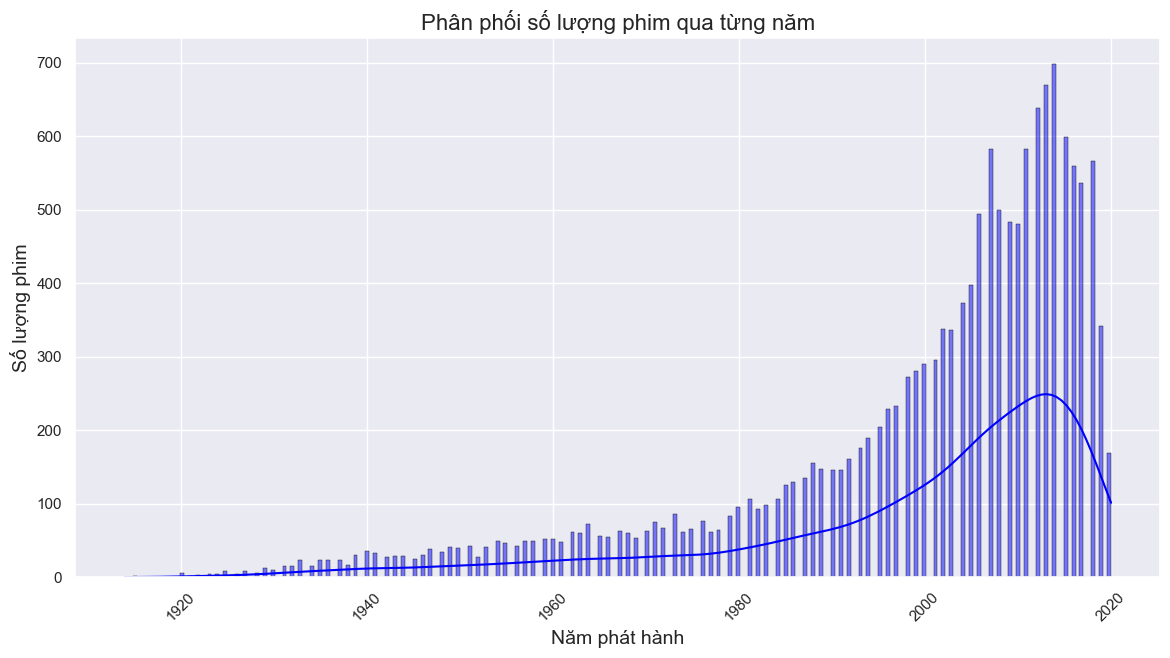

In [16]:
plt.figure(figsize=(14, 7))
sns.histplot(x=df_rt['Năm_chiếu'], bins=250,color='blue', edgecolor='black', kde=True)
plt.title('Phân phối số lượng phim qua từng năm', fontsize=16)
plt.xlabel('Năm phát hành', fontsize=14)
plt.ylabel('Số lượng phim', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [17]:
#Chỉ tập trung phân tích từ giai đoạn 2000 đến 2020
df_rt = df_rt[df_rt['Năm_chiếu'] >= 2000]
df_rt = df_rt.reset_index(drop=True)

In [18]:
#Tạo các nhãn cho các khoảng thời lượng
labels = ['Ngắn', 'Trung bình', 'Dài'] #Ngắn<60p, 60p<=TrungBinh<90p, Dài>=90p

#Tạo các khoảng giá trị cho các nhãn
bins = [0, 60, 90, float('inf')]  #'float('inf')' là giá trị vô cùng lớn để xử lý các phim dài

#Sử dụng pd.cut() để tạo cột mới "Độ_dài" dựa trên cột "Thời_lượng" và các khoảng đã định nghĩa
df_rt['Độ_dài'] = pd.cut(df_rt['Thời_lượng'], bins=bins, labels=labels, right=False)

#Xóa thuộc tính "Thời_lượng"
df_rt.drop('Thời_lượng', axis=1,inplace=True)

In [19]:
# Tách các giá trị trong thuộc tính "Đạo_diễn" thành danh sách các đạo diễn
df_rt['Đạo_diễn'] = df_rt['Đạo_diễn'].str.split(', ')

# Tạo DataFrame mới: df_DaoDien
df_DaoDien = df_rt.explode('Đạo_diễn')[['Tên_phim', 'Đạo_diễn']]

In [20]:
df_DaoDien.tail(10)

,Tên_phim,Đạo_diễn
9921,ZMD: Zombies of Mass Destruction,Kevin Hamedani
9922,Zoo,Colin McIvor
9923,Zookeeper,Frank Coraci
9923,Zookeeper,Walt Becker
9924,Zoolander,Ben Stiller
9925,Zoolander 2,Ben Stiller
9926,Zoom,Peter Hewitt
9927,Zootopia,Byron Howard
9927,Zootopia,Rich Moore
9927,Zootopia,Jared Bush


In [21]:
# Tách các giá trị trong thuộc tính "Diễn_viên_chính" thành danh sách các diễn viên chính
df_rt['Diễn_viên_chính'] = df_rt['Diễn_viên_chính'].str.split(', ')

# Tạo DataFrame mới: df_DienVienChinh
df_DienVienChinh = df_rt.explode('Diễn_viên_chính')[['Tên_phim', 'Diễn_viên_chính']]

In [22]:
df_DienVienChinh.tail(10)

,Tên_phim,Diễn_viên_chính
9927,Zootopia,Jared Bush
9927,Zootopia,John Lavelle
9927,Zootopia,Ginnifer Goodwin
9927,Zootopia,Jason Bateman
9927,Zootopia,Idris Elba
9927,Zootopia,Jenny Slate
9927,Zootopia,Nate Torrence
9927,Zootopia,Bonnie Hunt
9927,Zootopia,Don Lake
9927,Zootopia,Tommy Chong


In [24]:
# Tách các giá trị trong thuộc tính "Thể_loại" thành danh sách các thể loại
df_rt['Thể_loại'] = df_rt['Thể_loại'].str.split(', ')

# Tạo DataFrame mới: df_TheLoai
df_TheLoai = df_rt.explode('Thể_loại')[['Tên_phim', 'Thể_loại']]

In [25]:
df_TheLoai.tail(10)

,Tên_phim,Thể_loại
9923,Zookeeper,Romance
9924,Zoolander,Comedy
9924,Zoolander,Special Interest
9925,Zoolander 2,Comedy
9926,Zoom,Action & Adventure
9926,Zoom,Comedy
9926,Zoom,Kids & Family
9927,Zootopia,Action & Adventure
9927,Zootopia,Animation
9927,Zootopia,Comedy


In [26]:
#Kiểm tra lại giá trị NULL

df_rt.isna().sum()

Tên_phim                    0
Độ_tuổi                     0
Thể_loại                    0
Đạo_diễn                    0
Diễn_viên_chính             0
Hãng_phim                   0
Đánh_giá_của_Tomatometer    0
Đánh_giá_của_Audience       0
Ngày_chiếu                  0
Tháng_chiếu                 0
Năm_chiếu                   0
Độ_dài                      0
dtype: int64

In [27]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Tên_phim                  9928 non-null   object  
 1   Độ_tuổi                   9928 non-null   object  
 2   Thể_loại                  9928 non-null   object  
 3   Đạo_diễn                  9928 non-null   object  
 4   Diễn_viên_chính           9928 non-null   object  
 5   Hãng_phim                 9928 non-null   object  
 6   Đánh_giá_của_Tomatometer  9928 non-null   object  
 7   Đánh_giá_của_Audience     9928 non-null   object  
 8   Ngày_chiếu                9928 non-null   int32   
 9   Tháng_chiếu               9928 non-null   int32   
 10  Năm_chiếu                 9928 non-null   int32   
 11  Độ_dài                    9928 non-null   category
dtypes: category(1), int32(3), object(8)
memory usage: 746.8+ KB


In [28]:
df_rt.head(10)

,Tên_phim,Độ_tuổi,Thể_loại,Đạo_diễn,Diễn_viên_chính,Hãng_phim,Đánh_giá_của_Tomatometer,Đánh_giá_của_Audience,Ngày_chiếu,Tháng_chiếu,Năm_chiếu,Độ_dài
0,Percy Jackson & the Olympians: The Lightning T...,PG,"[Action & Adventure, Comedy, Drama, Science Fi...",[Chris Columbus],"[Logan Lerman, Brandon T. Jackson, Alexandra D...",20th Century Fox,Rotten,Spilled,12,2,2010,Dài
1,Please Give,R,[Comedy],[Nicole Holofcener],"[Catherine Keener, Amanda Peet, Oliver Platt, ...",Sony Pictures Classics,Certified-Fresh,Upright,30,4,2010,Dài
2,"10,000 B.C.",PG-13,"[Action & Adventure, Classics, Drama]",[Roland Emmerich],"[Steven Strait, Camilla Belle, Cliff Curtis, J...",Warner Bros. Pictures,Rotten,Spilled,7,3,2008,Dài
3,Charly (A Heartbeat Away),PG,"[Comedy, Drama, Romance]",[Adam Thomas Anderegg],"[Heather Beers, Gary Neilson, Lisa McCammon, J...",Excel Entertainment,Rotten,Upright,27,9,2002,Dài
4,Dark Water,PG-13,"[Art House & International, Horror, Mystery & ...",[Hideo Nakata],"[Hitomi Kuroki, Rio Kanno, Shigemitsu Ogi, Mir...",Toho Company Ltd,Fresh,Upright,19,1,2002,Dài
5,The Lost City,R,[Drama],[Andy Garcia],"[Andy Garcia, Dustin Hoffman, Bill Murray, Iné...",Magnolia Pictures,Rotten,Upright,3,9,2005,Dài
6,The Bridge of San Luis Rey,PG,"[Art House & International, Drama, Faith & Spi...",[Mary McGuckian],"[Gabriel Byrne, F. Murray Abraham, Kathy Bates...",Fine Line Features,Rotten,Spilled,10,6,2005,Dài
7,Criminal,R,"[Drama, Mystery & Suspense]","[Greggory Jacobs, Gregory Jacobs, Greg Jacobs]","[John C. Reilly, Diego Luna, Maggie Gyllenhaal...",Warner Bros. Pictures,Fresh,Spilled,24,9,2004,Trung bình
8,Deep Blue,G,"[Documentary, Special Interest]","[Andy Byatt, Alastair Fothergill]","[Pierce Brosnan, Michael Gambon]",Miramax Flims,Fresh,Upright,17,6,2005,Dài
9,Dead End,R,"[Comedy, Horror, Mystery & Suspense]","[Jean-Baptiste Andrea, Fabrice Canepa, Jean-Ba...","[Ray Wise, Lin Shaye, Mick Cain, Alexandra Hol...",LionsGate Entertainment,Fresh,Upright,26,9,2003,Trung bình


In [29]:
df_rt.tail(10)

,Tên_phim,Độ_tuổi,Thể_loại,Đạo_diễn,Diễn_viên_chính,Hãng_phim,Đánh_giá_của_Tomatometer,Đánh_giá_của_Audience,Ngày_chiếu,Tháng_chiếu,Năm_chiếu,Độ_dài
9918,Zombeavers,R,"[Action & Adventure, Comedy, Horror]",[Jordan Rubin],"[Rachel Melvin, Cortney Palm, Lexi Atkins, Hut...",Freestyle Releasing,Fresh,Spilled,20,3,2015,Trung bình
9919,Zombie Strippers,R,"[Comedy, Horror]",[Jay Lee],"[Jenna Jameson, Robert Englund, Roxy Saint, Jo...",Triumph Films,Rotten,Spilled,18,4,2008,Dài
9920,Zombieland,R,"[Comedy, Horror]",[Ruben Fleischer],"[Woody Harrelson, Jesse Eisenberg, Emma Stone,...",Sony/Columbia Pictures,Certified-Fresh,Upright,2,10,2009,Trung bình
9921,ZMD: Zombies of Mass Destruction,R,"[Comedy, Horror]",[Kevin Hamedani],"[Bill Johns, Cooper Hopkins, Doug Fahl, Janett...",Typecast Pictures,Fresh,Spilled,18,4,2009,Dài
9922,Zoo,PG,"[Action & Adventure, Kids & Family]",[Colin McIvor],"[Art Parkinson, Penelope Wilton, Amy Huberman,...",Samuel Goldwyn Films,Fresh,Upright,8,6,2018,Dài
9923,Zookeeper,PG,"[Comedy, Romance]","[Frank Coraci, Walt Becker]","[Kevin James, Rosario Dawson, Ken Jeong, Lesli...",Columbia Pictures,Rotten,Spilled,8,7,2011,Dài
9924,Zoolander,PG-13,"[Comedy, Special Interest]",[Ben Stiller],"[Ben Stiller, Owen Wilson, Will Ferrell, Chris...",Paramount Pictures,Fresh,Upright,28,9,2001,Trung bình
9925,Zoolander 2,PG-13,[Comedy],[Ben Stiller],"[Ben Stiller, Owen Wilson, Will Ferrell, Penel...",Paramount Pictures,Rotten,Spilled,12,2,2016,Dài
9926,Zoom,PG,"[Action & Adventure, Comedy, Kids & Family]",[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Spence...",Sony Pictures Entertainment,Rotten,Spilled,11,8,2006,Trung bình
9927,Zootopia,PG,"[Action & Adventure, Animation, Comedy]","[Byron Howard, Rich Moore, Jared Bush]","[J.K. Simmons, Kristen Bell, Octavia Spencer, ...",Walt Disney Animation Studios,Certified-Fresh,Upright,4,3,2016,Dài


# 5) Trực quan hóa dữ liệu

C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\863760865.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=countDaoDien.values, y=countDaoDien.index,edgecolor='black',palette='pastel')


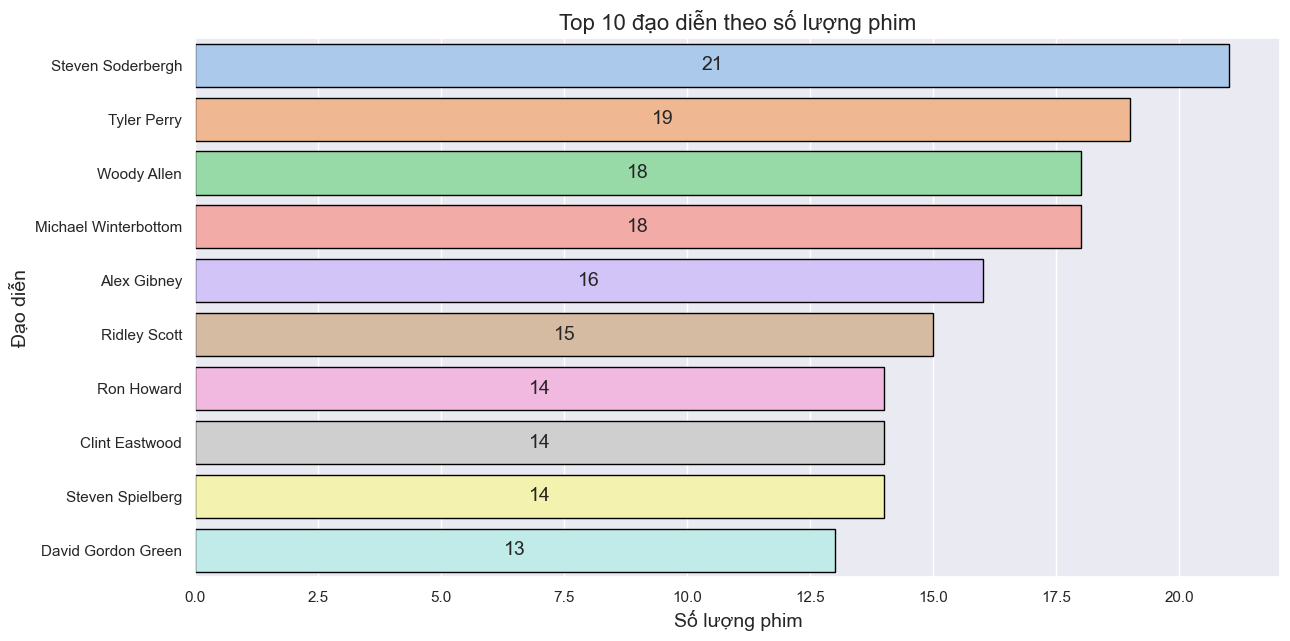

In [30]:
plt.figure(figsize=(14,7))
countDaoDien = df_DaoDien['Đạo_diễn'].value_counts()[:10]
ax = sns.barplot(x=countDaoDien.values, y=countDaoDien.index,edgecolor='black',palette='pastel')
for i in range(0,10):
    ax.bar_label(ax.containers[i], fontsize=14,label_type='center');
plt.xlabel('Số lượng phim',fontsize=14)
plt.ylabel('Đạo diễn',fontsize=14)
plt.title("Top 10 đạo diễn theo số lượng phim", fontsize=16)
plt.show()

C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\1804135172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=countDienVien.values, y=countDienVien.index, palette='pastel',edgecolor='black')


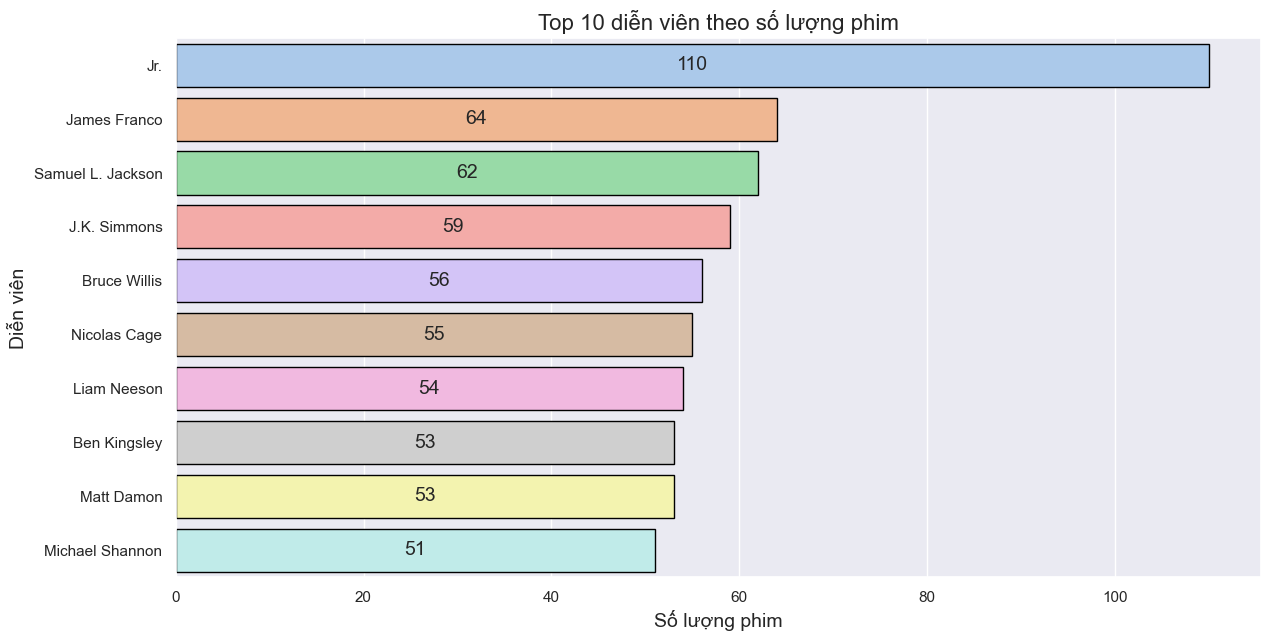

In [31]:
plt.figure(figsize=(14,7))
countDienVien = df_DienVienChinh['Diễn_viên_chính'].value_counts()[:10]
ax = sns.barplot(x=countDienVien.values, y=countDienVien.index, palette='pastel',edgecolor='black')
for i in range(0,10):
    ax.bar_label(ax.containers[i], fontsize=14,label_type='center');
plt.xlabel('Số lượng phim',fontsize=14)
plt.ylabel('Diễn viên',fontsize=14)
plt.title("Top 10 diễn viên theo số lượng phim", fontsize=16)
plt.show()

C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\2474900573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=countHangPhim.values, y=countHangPhim.index, palette='pastel',edgecolor='black')


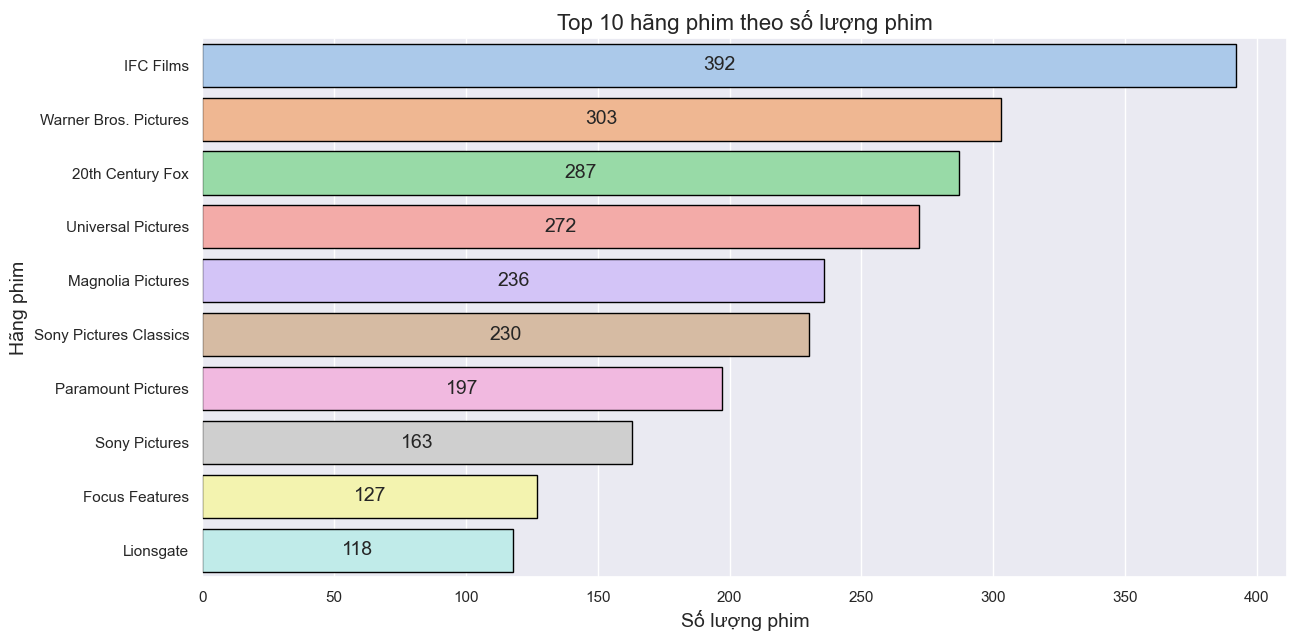

In [32]:
plt.figure(figsize=(14,7))
countHangPhim = df_rt['Hãng_phim'].value_counts()[:10]
ax = sns.barplot(x=countHangPhim.values, y=countHangPhim.index, palette='pastel',edgecolor='black')
for i in range(0,10):
    ax.bar_label(ax.containers[i], fontsize=14,label_type='center');
plt.xlabel('Số lượng phim',fontsize=14)
plt.ylabel('Hãng phim',fontsize=14)
plt.title("Top 10 hãng phim theo số lượng phim", fontsize=16)
plt.show()

C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\2108487576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=countTheLoai.values, y=countTheLoai.index, palette='pastel',edgecolor='black')


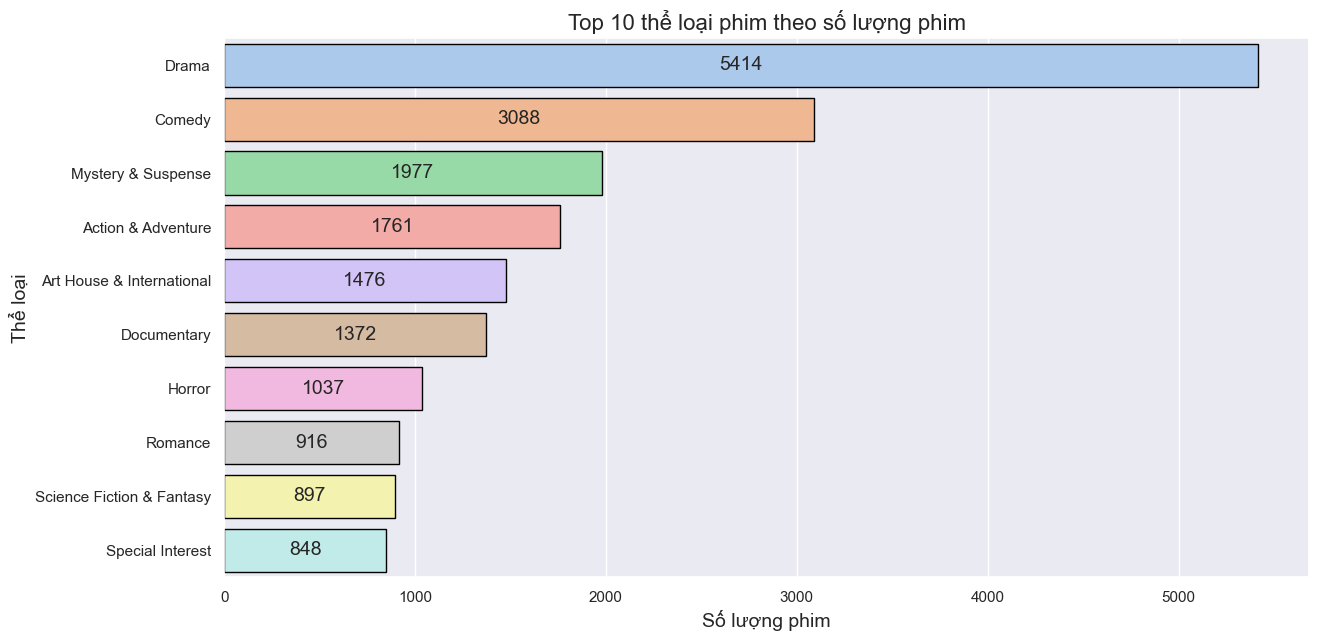

In [33]:
plt.figure(figsize=(14,7))
countTheLoai = df_TheLoai['Thể_loại'].value_counts()[:10]
ax = sns.barplot(x=countTheLoai.values, y=countTheLoai.index, palette='pastel',edgecolor='black')
for i in range(0,10):
    ax.bar_label(ax.containers[i], fontsize=14,label_type='center');
plt.xlabel('Số lượng phim',fontsize=14)
plt.ylabel('Thể loại',fontsize=14)
plt.title("Top 10 thể loại phim theo số lượng phim", fontsize=16)
plt.show()

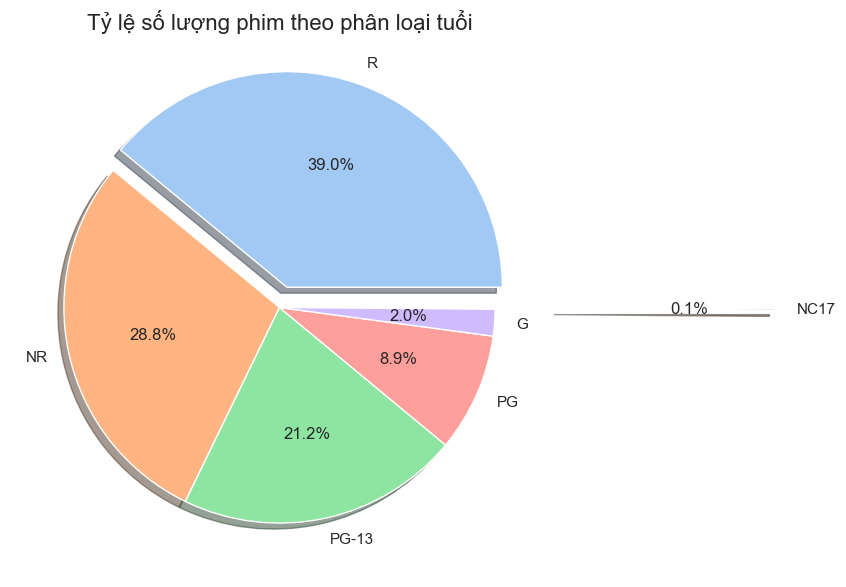

In [34]:
count = df_rt['Độ_tuổi'].value_counts()
plt.figure(figsize=(7, 7))
myexplode=[0.1,0,0,0,0,1.3]
plt.pie(count, labels=count.index, autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'),explode=myexplode,shadow=True)
plt.title('Tỷ lệ số lượng phim theo phân loại tuổi', fontsize=16)
plt.show()

C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\2757772351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df_rt, x="Độ_dài", palette='pastel',edgecolor='black')


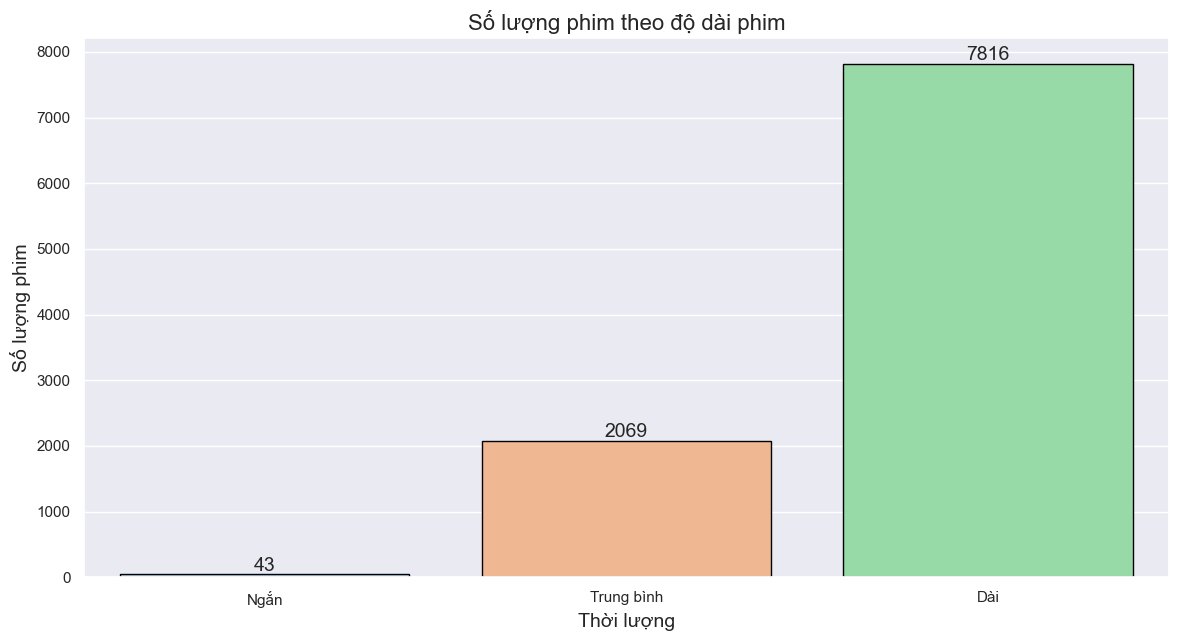

In [35]:
plt.figure(figsize=(14,7))
count = df_rt['Độ_dài'].value_counts()
ax = sns.countplot(df_rt, x="Độ_dài", palette='pastel',edgecolor='black')
for i in range(0,3):
    ax.bar_label(ax.containers[i], fontsize=14);
plt.xlabel('Thời lượng',fontsize=14)
plt.ylabel('Số lượng phim',fontsize=14)
plt.title("Số lượng phim theo độ dài phim", fontsize=16)
plt.show()

C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\2956018292.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movie_counts = df_rt.groupby(['Đánh_giá_của_Tomatometer', 'Độ_dài']).size().reset_index(name='Số_lượng_phim')
C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\2956018292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


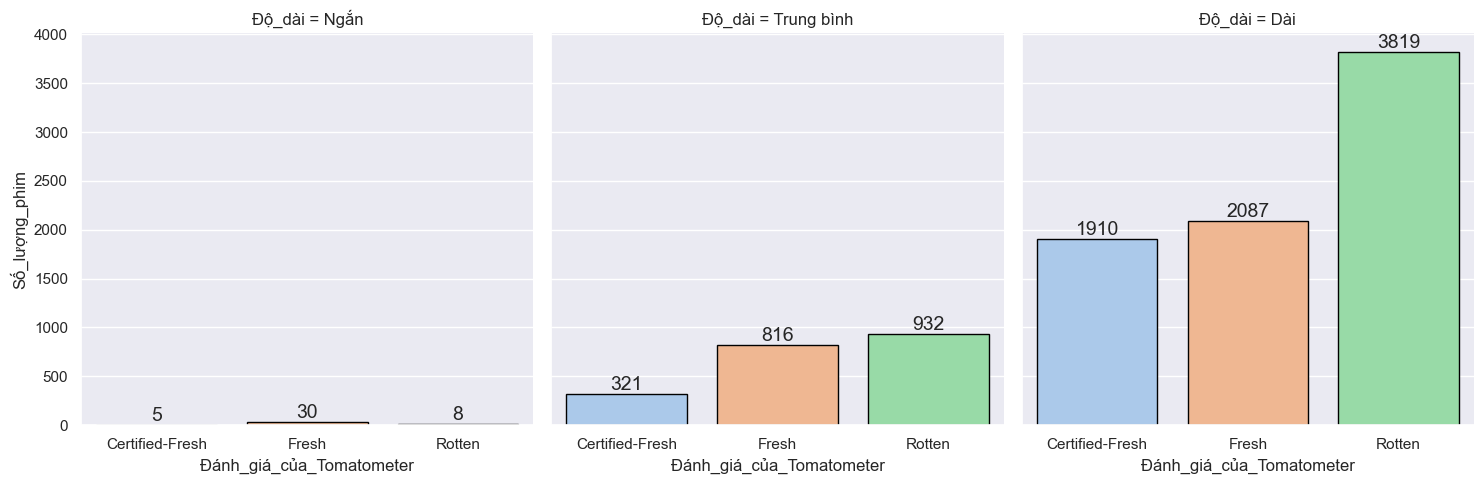

In [36]:
movie_counts = df_rt.groupby(['Đánh_giá_của_Tomatometer', 'Độ_dài']).size().reset_index(name='Số_lượng_phim')
g = sns.catplot(
    data=movie_counts, kind="bar",
    x="Đánh_giá_của_Tomatometer", y="Số_lượng_phim", col="Độ_dài",
    height=5, aspect=1, palette='pastel',edgecolor='black'
)
for ax in g.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container, fontsize=14)
plt.show()

C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\2058867962.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movie_counts = df_rt.groupby(['Đánh_giá_của_Audience', 'Độ_dài']).size().reset_index(name='Số_lượng_phim')
C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\2058867962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


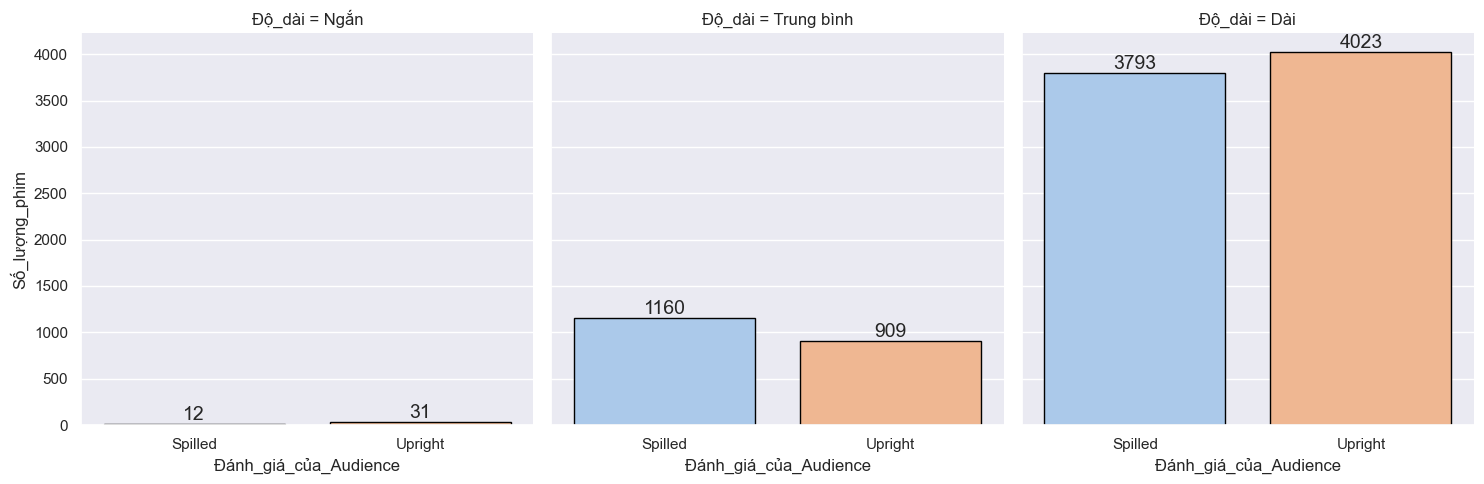

In [37]:
movie_counts = df_rt.groupby(['Đánh_giá_của_Audience', 'Độ_dài']).size().reset_index(name='Số_lượng_phim')
g = sns.catplot(
    data=movie_counts, kind="bar",
    x="Đánh_giá_của_Audience", y="Số_lượng_phim", col="Độ_dài",
    height=5, aspect=1, palette='pastel',edgecolor='black'
)
for ax in g.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container, fontsize=14)
plt.show()

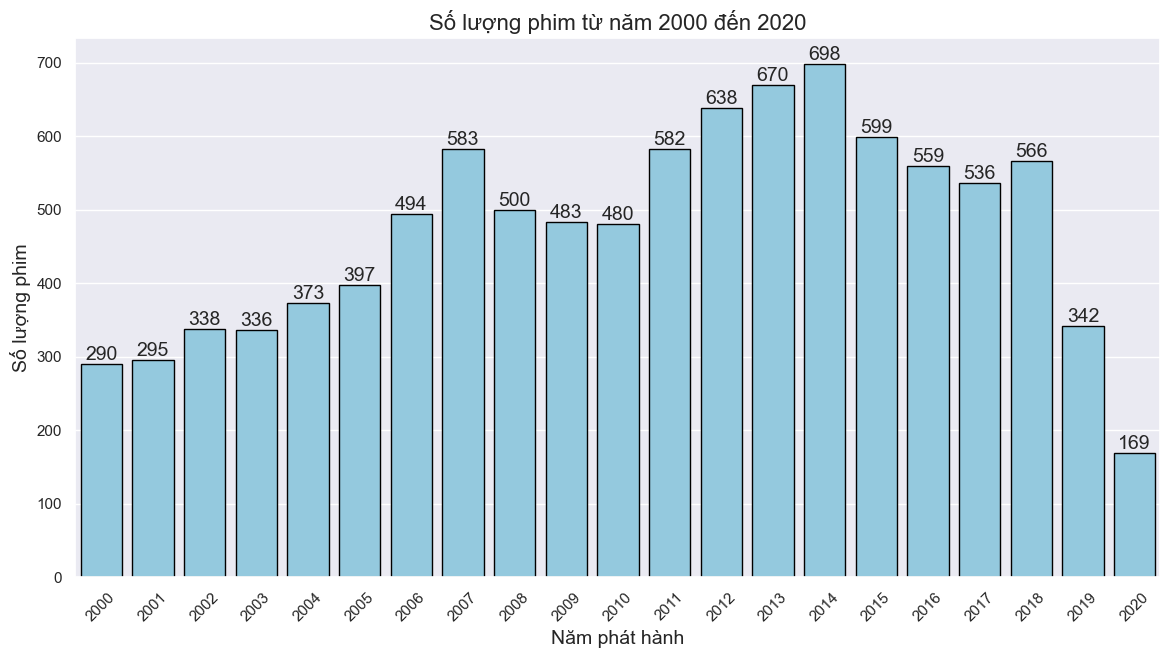

In [38]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=df_rt,x='Năm_chiếu',edgecolor='black',color='skyblue')
ax.bar_label(ax.containers[0], fontsize=14);
plt.title('Số lượng phim từ năm 2000 đến 2020', fontsize=16)
plt.xlabel('Năm phát hành',fontsize=14)
plt.ylabel('Số lượng phim',fontsize=14)
plt.xticks(rotation=45)  
plt.show()

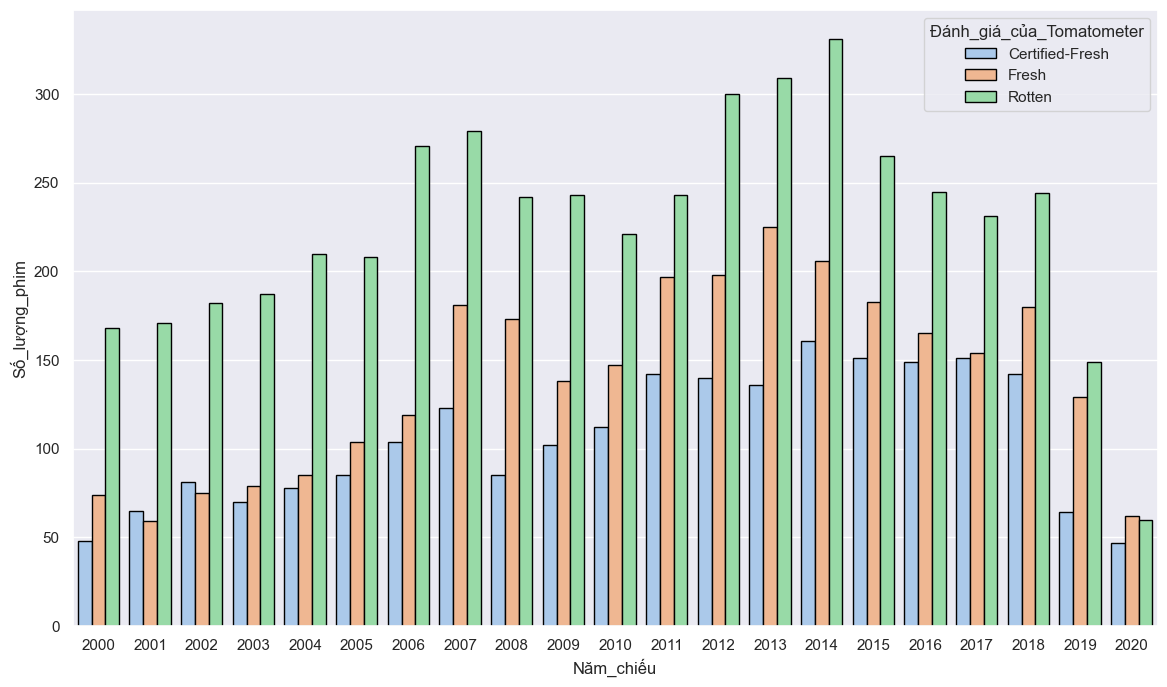

In [39]:
movie_counts = df_rt.groupby(['Đánh_giá_của_Tomatometer', 'Năm_chiếu']).size().reset_index(name='Số_lượng_phim')
plt.figure(figsize=(14, 8))
sns.barplot(movie_counts, x="Năm_chiếu", y="Số_lượng_phim", hue="Đánh_giá_của_Tomatometer",
                 edgecolor='black',palette='pastel')
plt.show()

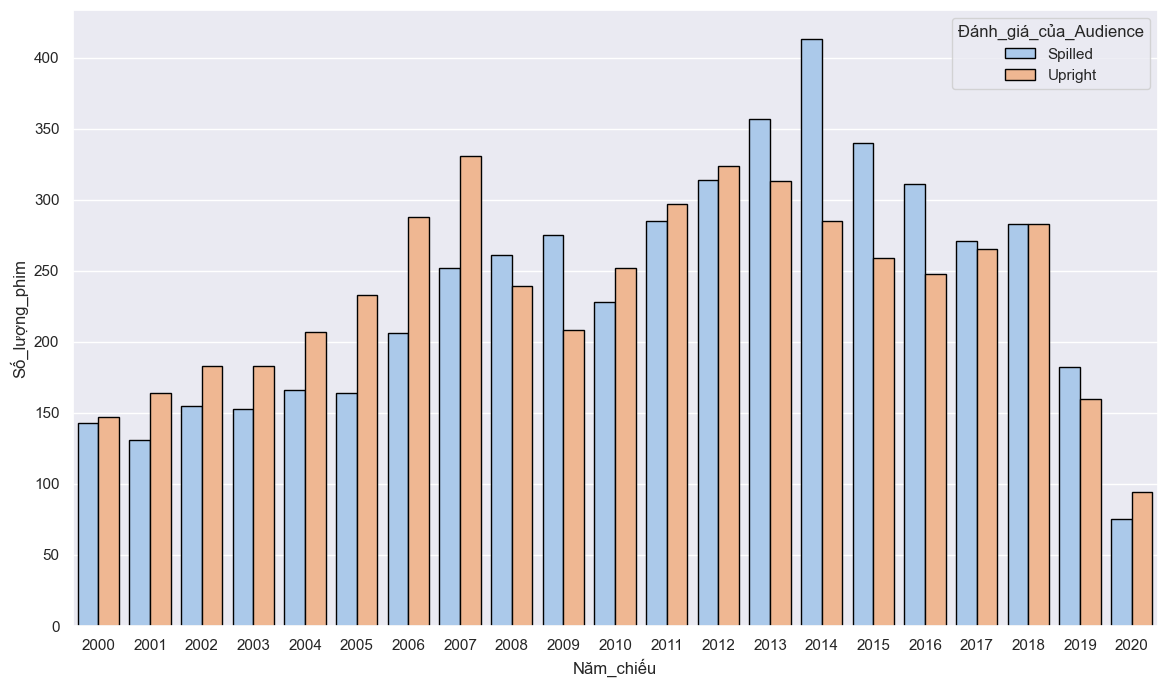

In [40]:
movie_counts = df_rt.groupby(['Đánh_giá_của_Audience', 'Năm_chiếu']).size().reset_index(name='Số_lượng_phim')
plt.figure(figsize=(14, 8))
sns.barplot(movie_counts, x="Năm_chiếu", y="Số_lượng_phim", 
                 hue="Đánh_giá_của_Audience",edgecolor='black',palette='pastel')
plt.show()

In [41]:
contradiction_movies = df_rt[((df_rt["Đánh_giá_của_Tomatometer"] == "Certified-Fresh") 
                              & (df_rt["Đánh_giá_của_Audience"] == "Spilled")) | 
                             ((df_rt["Đánh_giá_của_Tomatometer"] == "Rotten") 
                              & (df_rt["Đánh_giá_của_Audience"] == "Upright"))]
print("Số lượng phim mâu thuẫn trên Rotten Tomatoes: " + str(len(contradiction_movies)))
contradiction_movies.tail(5)

Số lượng phim mâu thuẫn trên Rotten Tomatoes: 1493


,Tên_phim,Độ_tuổi,Thể_loại,Đạo_diễn,Diễn_viên_chính,Hãng_phim,Đánh_giá_của_Tomatometer,Đánh_giá_của_Audience,Ngày_chiếu,Tháng_chiếu,Năm_chiếu,Độ_dài
9891,You're Not You,R,[Drama],[George C. Wolfe],"[Hilary Swank, Emmy Rossum, Josh Duhamel, Marc...",Entertainment One Films,Rotten,Upright,10,10,2014,Dài
9902,Z For Zachariah,PG-13,"[Drama, Science Fiction & Fantasy]",[Craig Zobel],"[Chiwetel Ejiofor, Margot Robbie, Chris Pine, ...",Roadside Attractions,Certified-Fresh,Spilled,28,8,2015,Dài
9904,Zathura: A Space Adventure,PG,"[Action & Adventure, Kids & Family, Science Fi...",[Jon Favreau],"[Jonah Bobo, Josh Hutcherson, Dax Shepard, Kri...",Sony Pictures,Certified-Fresh,Spilled,11,11,2005,Dài
9907,Zen Noir,NR,"[Art House & International, Comedy, Drama, Mys...",[Marc Rosenbush],"[Duane Sharp, Kim Chan, Jennifer Siebel, Ezra ...",Magic Lamp Releasing,Rotten,Upright,15,9,2006,Trung bình
9914,Zerophilia,NR,"[Art House & International, Comedy, Drama]",[Martin Curland],"[Taylor Handley, Alison Folland, Dustin Seavey...",GoDigital,Rotten,Upright,26,10,2005,Dài


In [42]:
good_movies = df_rt[(df_rt["Đánh_giá_của_Tomatometer"] == "Certified-Fresh") 
                         & (df_rt["Đánh_giá_của_Audience"] == "Upright") ]
print("Số lượng phim xuất sắc Rotten Tomatoes: " + str(len(good_movies)))

Số lượng phim xuất sắc Rotten Tomatoes: 1928


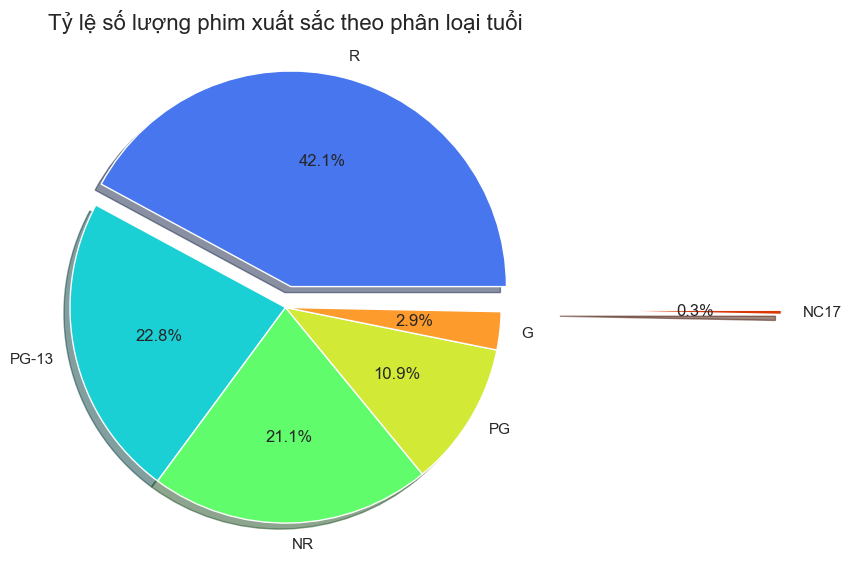

In [43]:
countDoTuoi = good_movies['Độ_tuổi'].value_counts()
plt.figure(figsize=(7, 7))
myexplode=[0.1,0,0,0,0,1.3]
plt.pie(countDoTuoi, labels=countDoTuoi.index, autopct='%1.1f%%', 
        colors=sns.color_palette('turbo'),
        explode=myexplode,shadow=True)
plt.title('Tỷ lệ số lượng phim xuất sắc theo phân loại tuổi', fontsize=16)
plt.show()

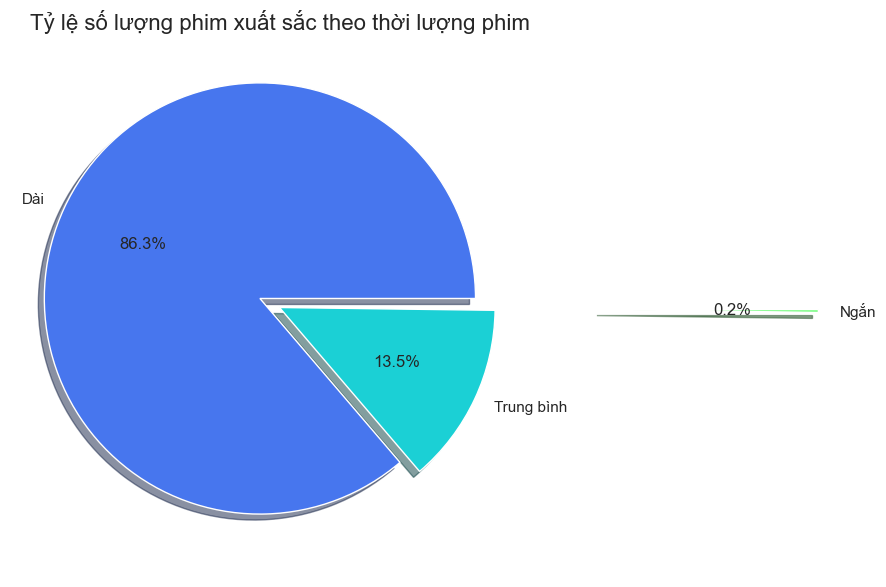

In [44]:
countDoDai = good_movies['Độ_dài'].value_counts()
plt.figure(figsize=(7, 7))
myexplode=[0.1,0,1.5]
plt.pie(countDoDai, labels=countDoDai.index, autopct='%1.1f%%', 
        colors=sns.color_palette('turbo'),explode=myexplode,shadow=True)
plt.title('Tỷ lệ số lượng phim xuất sắc theo thời lượng phim', fontsize=16)
plt.show()

C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\1205975847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=countHangPhim.values, y=countHangPhim.index,


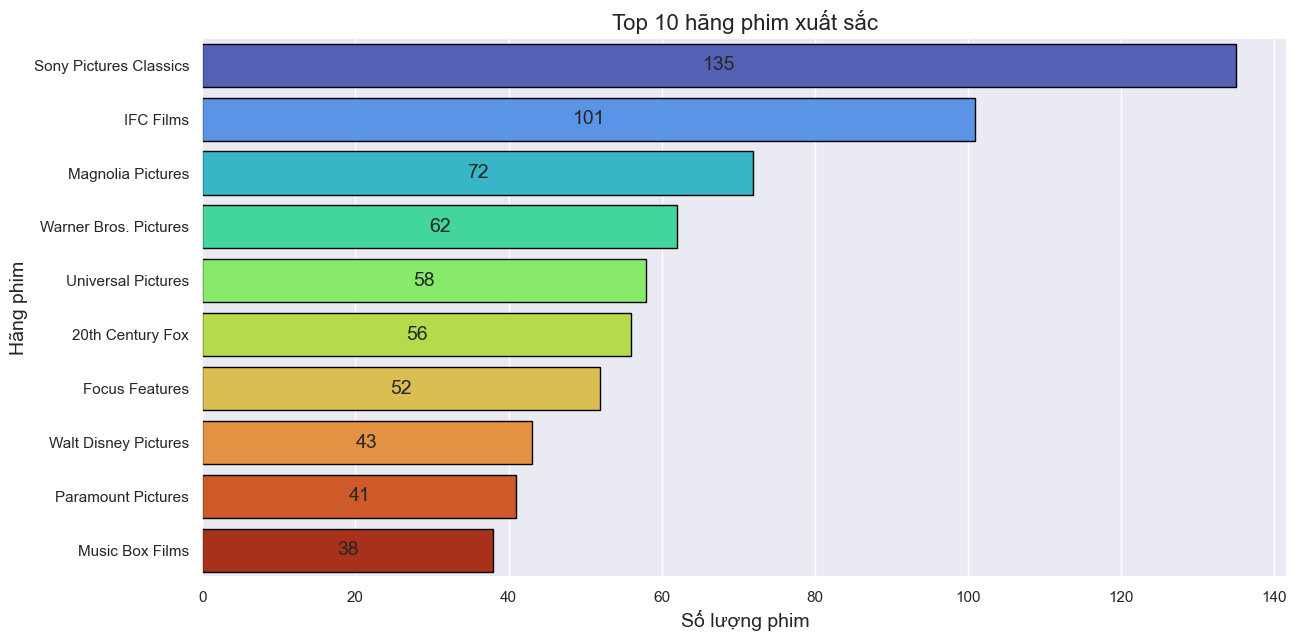

In [45]:
plt.figure(figsize=(14,7))
countHangPhim = good_movies['Hãng_phim'].value_counts()[:10]
ax = sns.barplot(x=countHangPhim.values, y=countHangPhim.index, 
                 palette='turbo',edgecolor='black')
for i in range(0,10):
    ax.bar_label(ax.containers[i], fontsize=14,label_type='center');
plt.xlabel('Số lượng phim',fontsize=14)
plt.ylabel('Hãng phim',fontsize=14)
plt.title("Top 10 hãng phim xuất sắc", fontsize=16)
plt.show()

C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\1133498588.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Thể_loại', x='Số_lượng_phim', palette='turbo',edgecolor='black',data=topTheLoai)


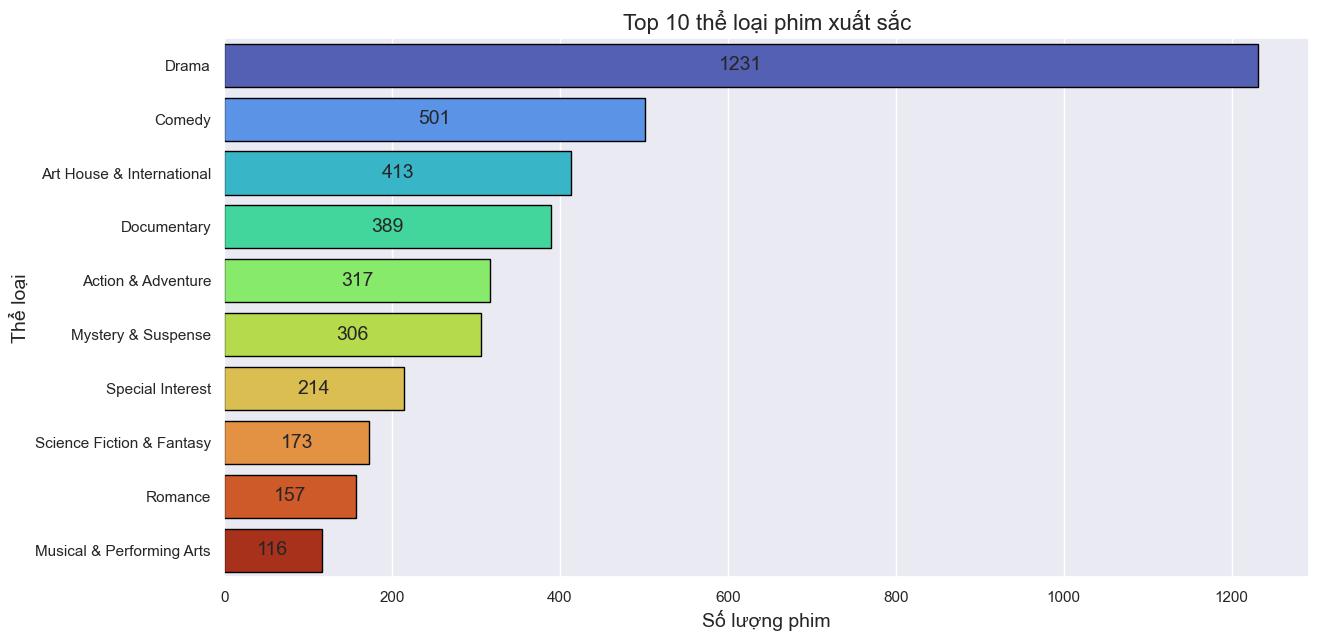

In [46]:
df_merge = pd.merge(good_movies, df_TheLoai, on='Tên_phim', how='inner')
df_merge.rename(columns={'Thể_loại_y': 'Thể_loại'}, inplace=True)
topTheLoai = df_merge.groupby('Thể_loại').size().reset_index(name='Số_lượng_phim')
topTheLoai = topTheLoai.sort_values(by='Số_lượng_phim', ascending=False).head(10)
plt.figure(figsize=(14,7))
ax = sns.barplot(y='Thể_loại', x='Số_lượng_phim', palette='turbo',edgecolor='black',data=topTheLoai)
for i in range(0,10):
    ax.bar_label(ax.containers[i], fontsize=14,label_type='center');
plt.xlabel('Số lượng phim',fontsize=14)
plt.ylabel('Thể loại',fontsize=14)
plt.title("Top 10 thể loại phim xuất sắc", fontsize=16)
plt.show()

C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\2754125055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Diễn_viên_chính', x='Số_lượng_phim', palette='turbo',edgecolor='black',data=topDienVien)


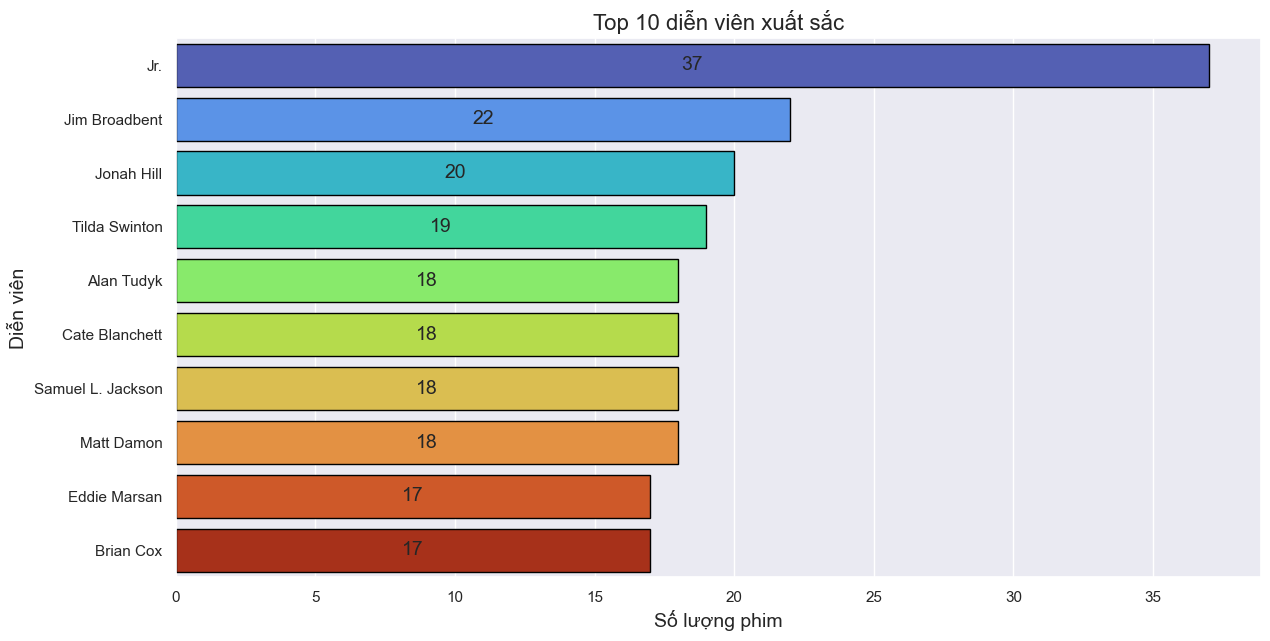

In [51]:
df_merge = pd.merge(good_movies, df_DienVienChinh, on='Tên_phim', how='inner')
df_merge.rename(columns={'Diễn_viên_chính_y': 'Diễn_viên_chính'}, inplace=True)
topDienVien = df_merge.groupby('Diễn_viên_chính').size().reset_index(name='Số_lượng_phim')
topDienVien = topDienVien.sort_values(by='Số_lượng_phim', ascending=False).head(10)
plt.figure(figsize=(14,7))
ax = sns.barplot(y='Diễn_viên_chính', x='Số_lượng_phim', palette='turbo',edgecolor='black',data=topDienVien)
for i in range(0,10):
    ax.bar_label(ax.containers[i], fontsize=14,label_type='center');
plt.xlabel('Số lượng phim',fontsize=14)
plt.ylabel('Diễn viên',fontsize=14)
plt.title("Top 10 diễn viên xuất sắc", fontsize=16)
plt.show()

C:\Users\quoch\AppData\Local\Temp\ipykernel_6432\2542664050.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Đạo_diễn', x='Số_lượng_phim', palette='turbo',edgecolor='black',data=topDaoDien)


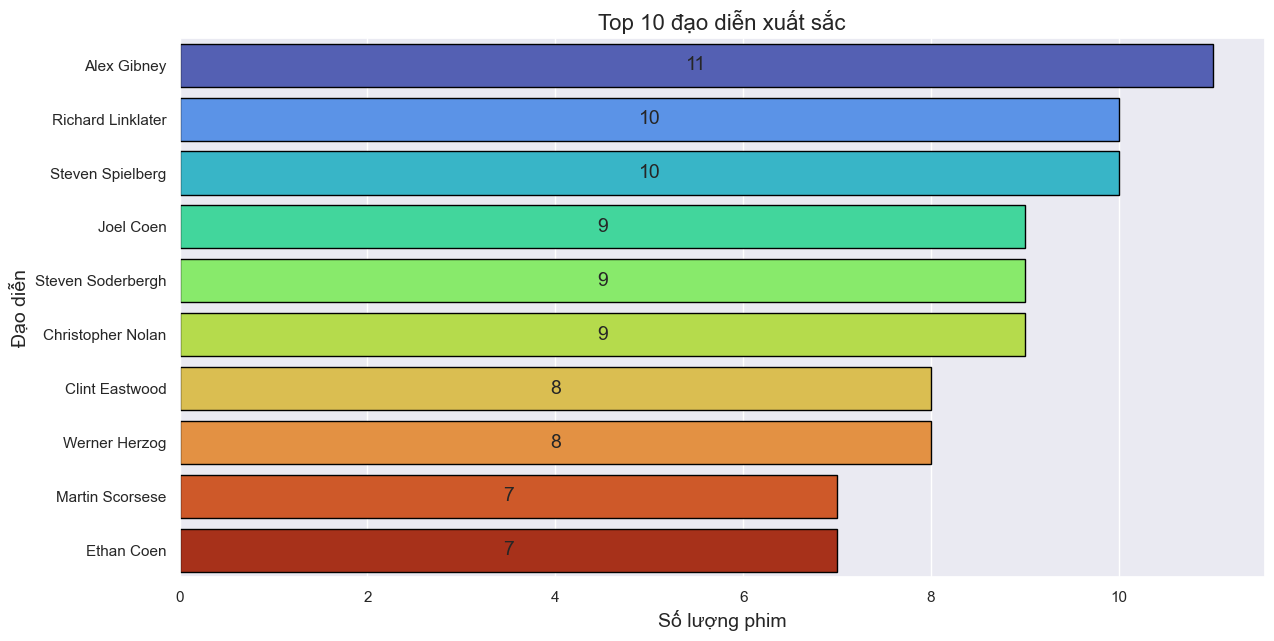

In [52]:
df_merge = pd.merge(good_movies, df_DaoDien, on='Tên_phim', how='inner')
df_merge.rename(columns={'Đạo_diễn_y': 'Đạo_diễn'}, inplace=True)
topDaoDien = df_merge.groupby('Đạo_diễn').size().reset_index(name='Số_lượng_phim')
topDaoDien = topDaoDien.sort_values(by='Số_lượng_phim', ascending=False).head(10)
plt.figure(figsize=(14,7))
ax = sns.barplot(y='Đạo_diễn', x='Số_lượng_phim', palette='turbo',edgecolor='black',data=topDaoDien)
for i in range(0,10):
    ax.bar_label(ax.containers[i], fontsize=14,label_type='center');
plt.xlabel('Số lượng phim',fontsize=14)
plt.ylabel('Đạo diễn',fontsize=14)
plt.title("Top 10 đạo diễn xuất sắc", fontsize=16)
plt.show()

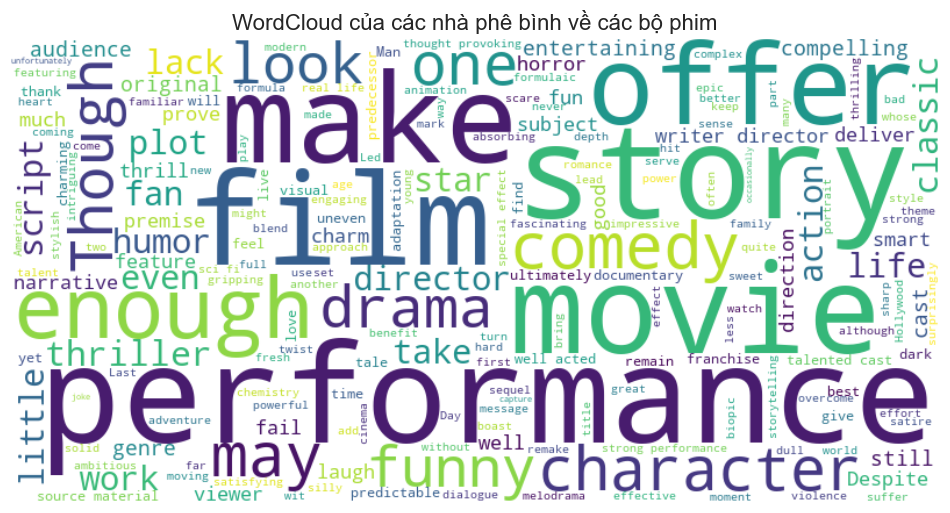

In [65]:
directors_list = df['critics_consensus'].dropna().tolist()
directors_text = ' '.join(map(str, directors_list))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(directors_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud của các nhà phê bình về các bộ phim',fontsize=16)
plt.show()